<a href="https://colab.research.google.com/github/cuaiswarya/Machine-Learning/blob/main/SpotifySkipPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using NLP Techniques to Predict Song Skips on Spotify based on Sequential User and Acoustic Data

# Import library, Load data and View data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from scipy import stats

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
#pip install mlxtend

In [ ]:
#from mlxtend.preprocessing import minmax_scaling

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import datetime

In [ ]:
sp_data = pd.read_csv("/content/drive/MyDrive/spotify/Training.csv")

NameError: ignored

In [ ]:
sp_track = pd.read_csv("/content/drive/MyDrive/spotify/Track features.csv")

In [ ]:
df = pd.merge(sp_data, sp_track, left_on='track_id_clean', right_on='track_id')

In [ ]:
np.random.seed(0)

In [ ]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,1,1,0,0,False,17,2018-07-15,True,editorial_playlist,fwdbtn,endplay,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,1,1,0,0,False,21,2018-07-14,True,user_collection,trackdone,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,1,0,0,0,0,False,18,2018-07-15,True,editorial_playlist,fwdbtn,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,1,1,0,0,True,19,2018-07-14,False,editorial_playlist,trackdone,fwdbtn,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [ ]:
df.tail()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
167875,0_0ead11fc-f32c-4eb4-8fc1-15b51432a404,8,20,t_c6d511e7-d986-4614-b694-ace9df48a665,True,True,True,False,0,0,1,1,0,0,True,22,2018-07-14,True,user_collection,fwdbtn,fwdbtn,t_c6d511e7-d986-4614-b694-ace9df48a665,181.263672,2018,98.762147,0.198840,0.700805,0.773838,0.765879,11.919822,0.772188,1.035604,9.283284e-09,10,0.108615,-3.749,0.785888,minor,0.206617,0.052655,159.912994,4,0.599401,-0.842907,0.325243,0.207480,0.064804,-0.258140,-0.001348,-0.548543,0.176667
167876,0_0ead11fc-f32c-4eb4-8fc1-15b51432a404,10,20,t_44a3360f-a06d-458a-91fc-4d9efa506697,True,True,True,False,0,0,1,1,0,0,True,22,2018-07-14,True,user_collection,fwdbtn,fwdbtn,t_44a3360f-a06d-458a-91fc-4d9efa506697,171.258774,2014,99.849173,0.392802,0.601739,0.730292,0.736095,11.895762,0.820989,0.968619,2.642195e-05,6,0.116691,-7.242,0.506887,minor,0.445788,0.393998,150.136993,4,0.322569,-0.922512,0.331971,0.218592,0.093307,-0.309999,-0.004573,-0.549420,0.219733
167877,0_0ead11fc-f32c-4eb4-8fc1-15b51432a404,16,20,t_3f71a175-f7ca-4cd4-829d-65fc82b09486,False,False,False,True,0,1,0,0,0,0,True,22,2018-07-14,True,user_collection,trackdone,trackdone,t_3f71a175-f7ca-4cd4-829d-65fc82b09486,208.623718,2018,99.788573,0.010805,0.709752,0.739182,0.841011,10.641563,0.447803,1.046258,1.882513e-08,0,0.083500,-8.056,0.794020,major,0.145850,0.100336,99.990997,4,0.443760,-0.771976,0.383800,0.367541,0.026499,-0.370684,0.083014,-0.334056,0.097527
167878,0_0ead11fc-f32c-4eb4-8fc1-15b51432a404,17,20,t_ac792fc0-a591-4c0f-a03c-652a97a864d2,False,False,True,False,0,0,1,1,0,0,True,22,2018-07-14,True,user_collection,trackdone,fwdbtn,t_ac792fc0-a591-4c0f-a03c-652a97a864d2,166.465576,2017,99.636870,0.017045,0.698399,0.696018,0.807472,9.638963,0.731210,1.002360,1.419743e-07,5,0.090325,-4.988,0.726531,minor,0.193747,0.195585,103.028999,4,0.416596,-0.978526,0.346568,0.250859,0.163195,-0.274763,-0.047336,-0.546883,0.142521
167879,0_0ead11fc-f32c-4eb4-8fc1-15b51432a404,20,20,t_76cb529c-86e9-41e2-a136-f5bd97481a9a,True,True,True,False,0,0,1,1,0,0,True,22,2018-07-14,True,user_collection,fwdbtn,fwdbtn,t_76cb529c-86e9-41e2-a136-f5bd97481a9a,240.195923,2017,99.794210,0.136814,0.618732,0.715664,0.801813,11.178164,0.782164,0.941293,8.908013e-13,7,0.107472,-4.485,0.639918,major,0.272376,0.372351,143.992996,4,0.583041,-0.883477,0.275426,0.203538,0.146071,-0.287761,-0.047060,-0.573223,0.141425


Check missing data points

In [ ]:
missing_values_count = df.isnull().sum()

In [ ]:
total_cells = np.product(df.shape)

In [ ]:
total_missing = missing_values_count.sum()

In [ ]:
percent_missing = (total_missing/total_cells) * 100

In [ ]:
print(percent_missing)

0.0


We got zero missing data points.

In [ ]:
print(df['date'].head())

0    2018-07-15
1    2018-07-15
2    2018-07-14
3    2018-07-15
4    2018-07-14
Name: date, dtype: object


In [ ]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

In [ ]:
#df[df["skip1"]==1]

# Check for categorial variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df['mode'] = df['mode'].replace({
    'major': 1,
    'minor': 0
})
df['skip_1'] = df['skip_1'].replace({
    True: 1,
    False: 0
})
df['skip_2'] = df['skip_2'].replace({
    True: 1,
    False: 0
})
df['skip_3'] = df['skip_3'].replace({
    True: 1,
    False: 0
})
df['not_skipped'] = df['not_skipped'].replace({
    True: 1,
    False: 0
})
df['hist_user_behavior_is_shuffle'] = df['hist_user_behavior_is_shuffle'].replace({
    True: 1,
    False: 0
})
df['premium'] = df['premium'].replace({
    True: 1,
    False: 0
})

In [ ]:
#df = (df.dtypes == 'object')
#object_cols = list(s[s].index)
#print("Categorical variables:")
#print(object_cols)

In [ ]:
df = pd.get_dummies(df, columns = ['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'])

In [ ]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,0,0,0,0,1,16,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0,1,1,0,0,0,17,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,1,1,0,0,0,21,2018-07-14,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,1,0,0,0,0,0,18,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0,1,1,0,0,1,19,2018-07-14,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
df.shape

(167880, 70)

In [ ]:
df.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'track_id', 'duration',
       'release_year', 'us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'mode', 'organism', 'speechiness', 'tempo',
       'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7',
       'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist

# Data Visualization

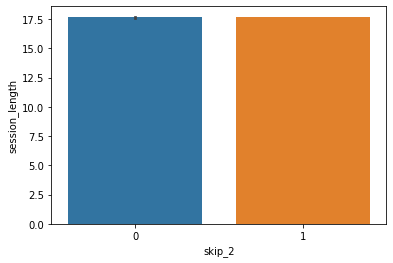

In [ ]:
sns.barplot(x=df['skip_2'],y=sp_data['session_length'])

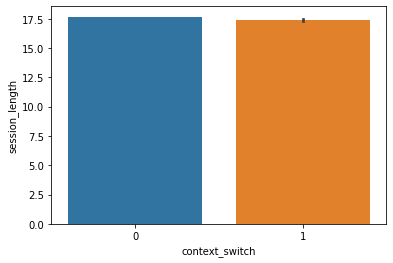

In [ ]:
sns.barplot(x=sp_data['context_switch'],y=sp_data['session_length'])

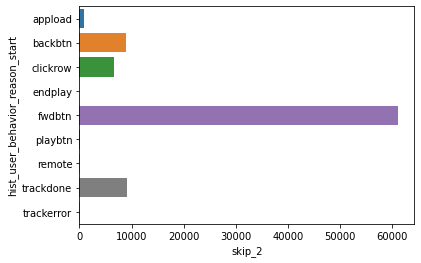

In [ ]:
variable = sp_data.groupby('hist_user_behavior_reason_start')['skip_2'].sum()
sns.barplot(y=variable .keys() , x =variable)

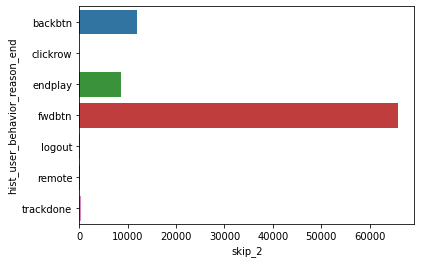

In [ ]:
variable = sp_data.groupby('hist_user_behavior_reason_end')['skip_2'].sum()
sns.barplot(y=variable .keys() , x =variable)

In [ ]:
#sns.barplot(x=df['skip_2'],y=df['shuffle'])

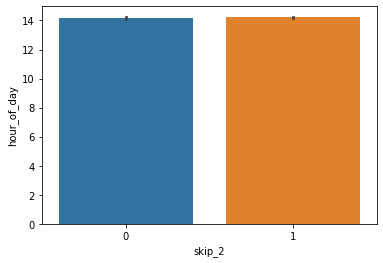

In [ ]:
sns.barplot(x=df['skip_2'],y=sp_data['hour_of_day'])

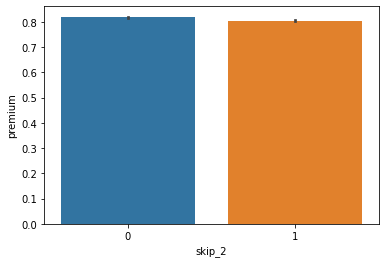

In [ ]:
sns.barplot(x=df['skip_2'],y=df['premium'])

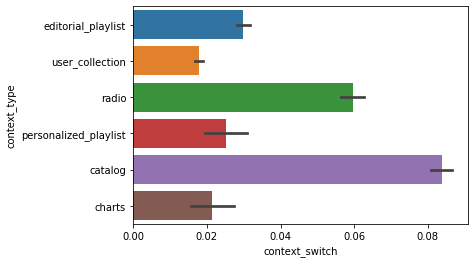

In [ ]:
sns.barplot(x=sp_data['context_switch'],y=sp_data['context_type'])


In [ ]:
sp_track.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

# Track Features Visualization

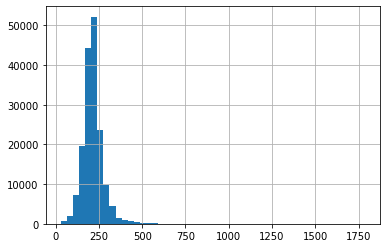

In [ ]:
df.duration.hist(bins=50)

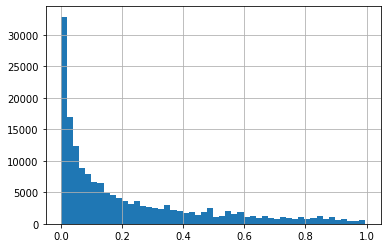

In [ ]:
df.acousticness.hist(bins=50)

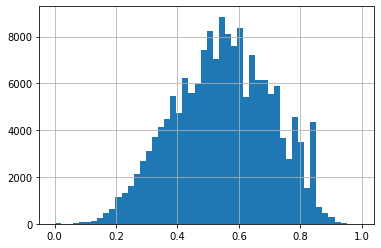

In [ ]:
df.beat_strength.hist(bins=50)

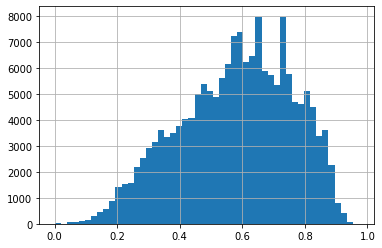

In [ ]:
df.bounciness.hist(bins=50)

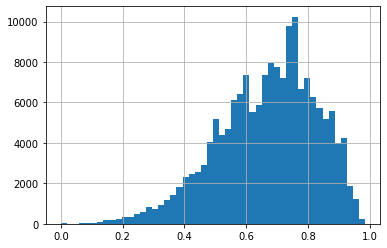

In [ ]:
df.danceability.hist(bins=50)

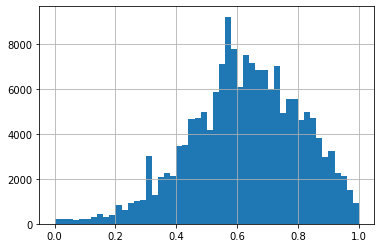

In [ ]:
df.energy.hist(bins=50)

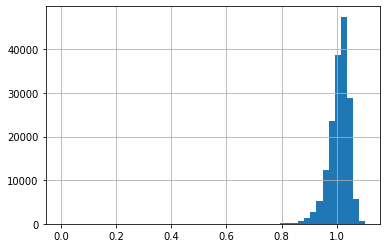

In [ ]:
df.flatness.hist(bins=50)

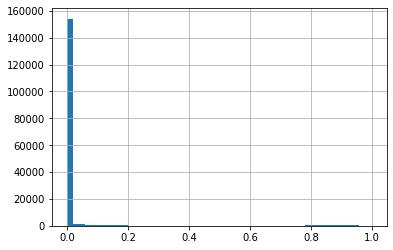

In [ ]:
df.instrumentalness.hist(bins=50)

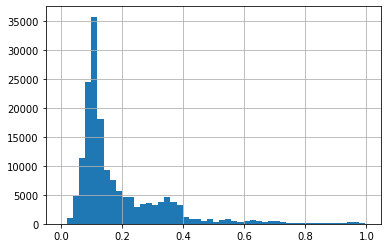

In [ ]:
df.liveness.hist(bins=50)

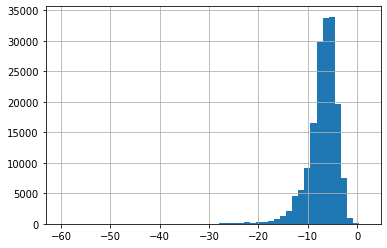

In [ ]:
df.loudness.hist(bins=50)

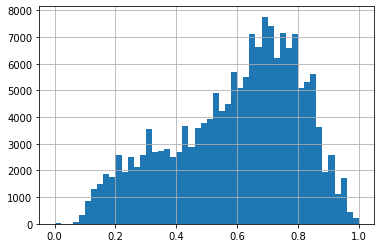

In [ ]:
df.mechanism.hist(bins=50)

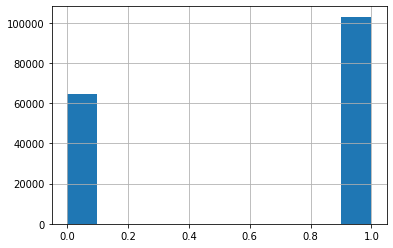

In [ ]:
df['mode'].hist();

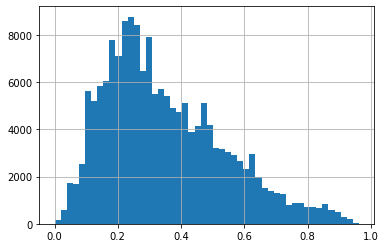

In [ ]:
df.organism.hist(bins=50)

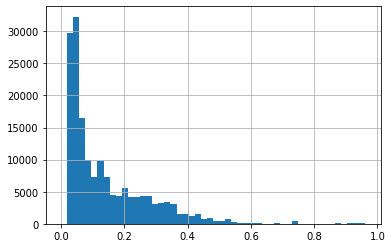

In [ ]:
df.speechiness.hist(bins=50)

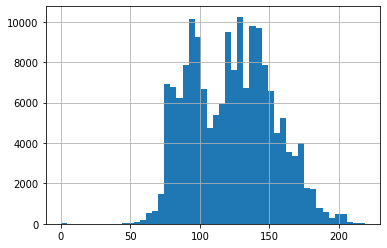

In [ ]:
df.tempo.hist(bins=50)

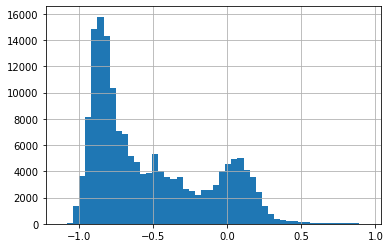

In [ ]:
df.acoustic_vector_0.hist(bins=50)

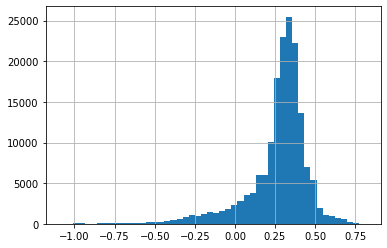

In [ ]:
df.acoustic_vector_1.hist(bins=50)

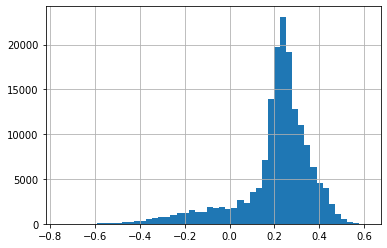

In [ ]:
df.acoustic_vector_2.hist(bins=50)

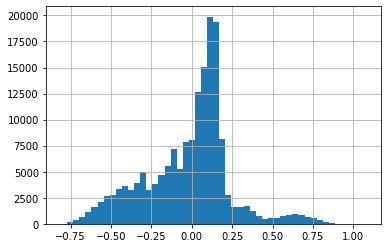

In [ ]:
df.acoustic_vector_3.hist(bins=50)

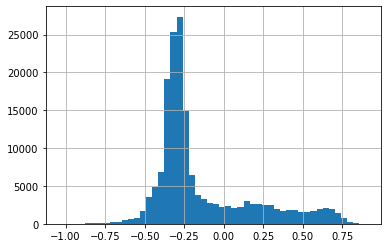

In [ ]:
df.acoustic_vector_4.hist(bins=50)

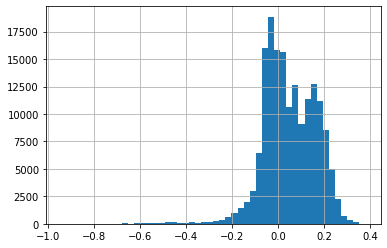

In [ ]:
df.acoustic_vector_5.hist(bins=50)

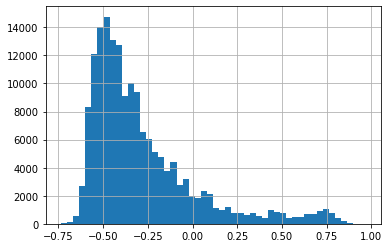

In [ ]:
df.acoustic_vector_6.hist(bins=50)

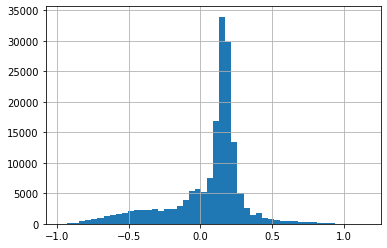

In [ ]:
df.acoustic_vector_7.hist(bins=50)

# Correlation Heatmap

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,0,0,0,0,1,16,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0,1,1,0,0,0,17,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,1,1,0,0,0,21,2018-07-14,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,1,0,0,0,0,0,18,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0,1,1,0,0,1,19,2018-07-14,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
data_training = df[df['session_position']<10].copy()
data_test = df[df['session_position'] >= 10].copy()

In [ ]:
sc = MinMaxScaler()

In [ ]:
scaling_col = ["hist_user_behavior_n_seekfwd","hist_user_behavior_n_seekback","duration","acousticness","beat_strength","acousticness", "beat_strength","bounciness", "danceability","dyn_range_mean", "energy", 'flatness', "instrumentalness", "mode","key","liveness", "loudness", "mechanism", "organism", "speechiness","tempo", "time_signature", "valence","acoustic_vector_0","acoustic_vector_1","acoustic_vector_2","acoustic_vector_3","acoustic_vector_4","acoustic_vector_5","acoustic_vector_6","acoustic_vector_7"]

In [ ]:
df1 = df.copy()

In [ ]:
for i in scaling_col:
    df1[i] = sc.fit_transform(df1[[i]])

In [ ]:
df1.shape

(167880, 70)

In [ ]:
df1.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,0,0,0.0,0.0,1,16,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0,1,1,0.0,0.0,0,17,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,1,1,0.0,0.0,0,21,2018-07-14,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,1,0,0,0.0,0.0,0,18,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0,1,1,0.0,0.0,1,19,2018-07-14,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
df1.corr()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
session_position,1.000000,0.313508,0.055365,0.040010,0.001222,0.005463,-0.020918,0.194384,0.027115,0.023199,-0.035673,-0.023678,0.012484,-0.004032,0.023865,-0.004804,0.000361,-0.004715,-0.000785,-0.001171,-0.000398,0.000282,-0.002668,-0.000711,-0.001986,0.003824,0.003461,0.002167,-0.002581,-0.002795,-0.013140,0.000002,0.008056,0.002231,-0.003851,0.007374,-0.008291,0.001391,0.002641,0.007888,-0.002797,-0.008197,-0.001811,0.003820,-0.030505,0.008338,0.000155,-0.007394,0.029727,0.005824,-0.123902,0.002729,-0.103459,-0.012152,0.094139,-0.030456,-0.013439,-0.003044,-0.000093,-0.016967,-0.005630,-0.057114,0.042403,0.024684,-0.017311,-0.002379
session_length,0.313508,1.000000,0.090904,0.078193,0.060131,-0.059734,-0.012779,0.053717,-0.007410,-0.020236,-0.008572,-0.016171,0.032005,-0.013001,0.075817,-0.010037,0.010267,0.003600,-0.002614,0.011249,0.013911,0.012469,0.011267,-0.008518,0.011915,-0.002057,0.004523,-0.000597,-0.005544,0.000219,-0.008620,-0.002238,0.014414,0.005955,0.000052,-0.003812,-0.026988,0.001407,0.007729,0.022729,-0.009516,-0.022487,-0.015920,0.007080,-0.047158,0.020851,-0.001528,-0.019560,0.033864,0.018899,-0.035697,-0.012378,-0.019048,-0.001601,0.068591,-0.005332,-0.001997,-0.045046,0.003498,-0.011376,-0.015436,-0.011282,0.078087,-0.043507,-0.009830,-0.062653
skip_1,0.055365,0.090904,1.000000,0.824751,0.628597,-0.602966,-0.094305,0.191440,-0.129213,-0.163313,-0.043591,-0.051059,0.052393,0.011958,-0.027076,0.017686,-0.001480,0.005001,-0.021315,0.006606,0.011013,0.009693,0.010775,0.004704,0.002431,-0.017852,0.003254,0.002677,0.009349,-0.001300,-0.011358,-0.010563,0.021412,0.005366,0.009910,-0.005272,-0.034232,0.017919,0.013202,0.011871,-0.020942,-0.014580,-0.029346,0.013716,-0.084111,0.007368,-0.019998,-0.024352,0.021333,0.078987,-0.037742,0.129333,-0.125183,-0.004896,0.507920,-0.009665,-0.009041,-0.522620,0.000114,0.231338,0.006340,-0.082649,0.512890,-0.036161,-0.017419,-0.615334
skip_2,0.040010,0.078193,0.824751,1.000000,0.762141,-0.731088,-0.073632,0.105180,-0.033340,-0.073393,0.003953,-0.036935,0.048836,0.009774,-0.016049,0.019314,-0.007481,-0.004016,-0.018282,0.001073,0.006000,0.004638,0.007270,0.006438,-0.001484,-0.012767,0.002002,0.004030,0.006790,-0.005497,-0.011581,-0.005904,0.019807,0.005414,0.007547,-0.000653,-0.025665,0.011355,0.011561,0.013393,-0.015201,-0.015895,-0.017240,0.009701,-0.065949,0.009218,-0.009359,-0.017446,0.027753,0.047917,-0.012526,0.097735,-0.094677,-0.002560,0.472379,-0.002026,-0.004331,-0.493171,-0.001314,0.223093,0.006670,0.037386,0.568416,-0.026427,-0.005111,-0.743031
skip_3,0.001222,0.060131,0

In [ ]:
#df1=df1.drop(["skip_1","skip_3","not_skipped"],axis='columns')

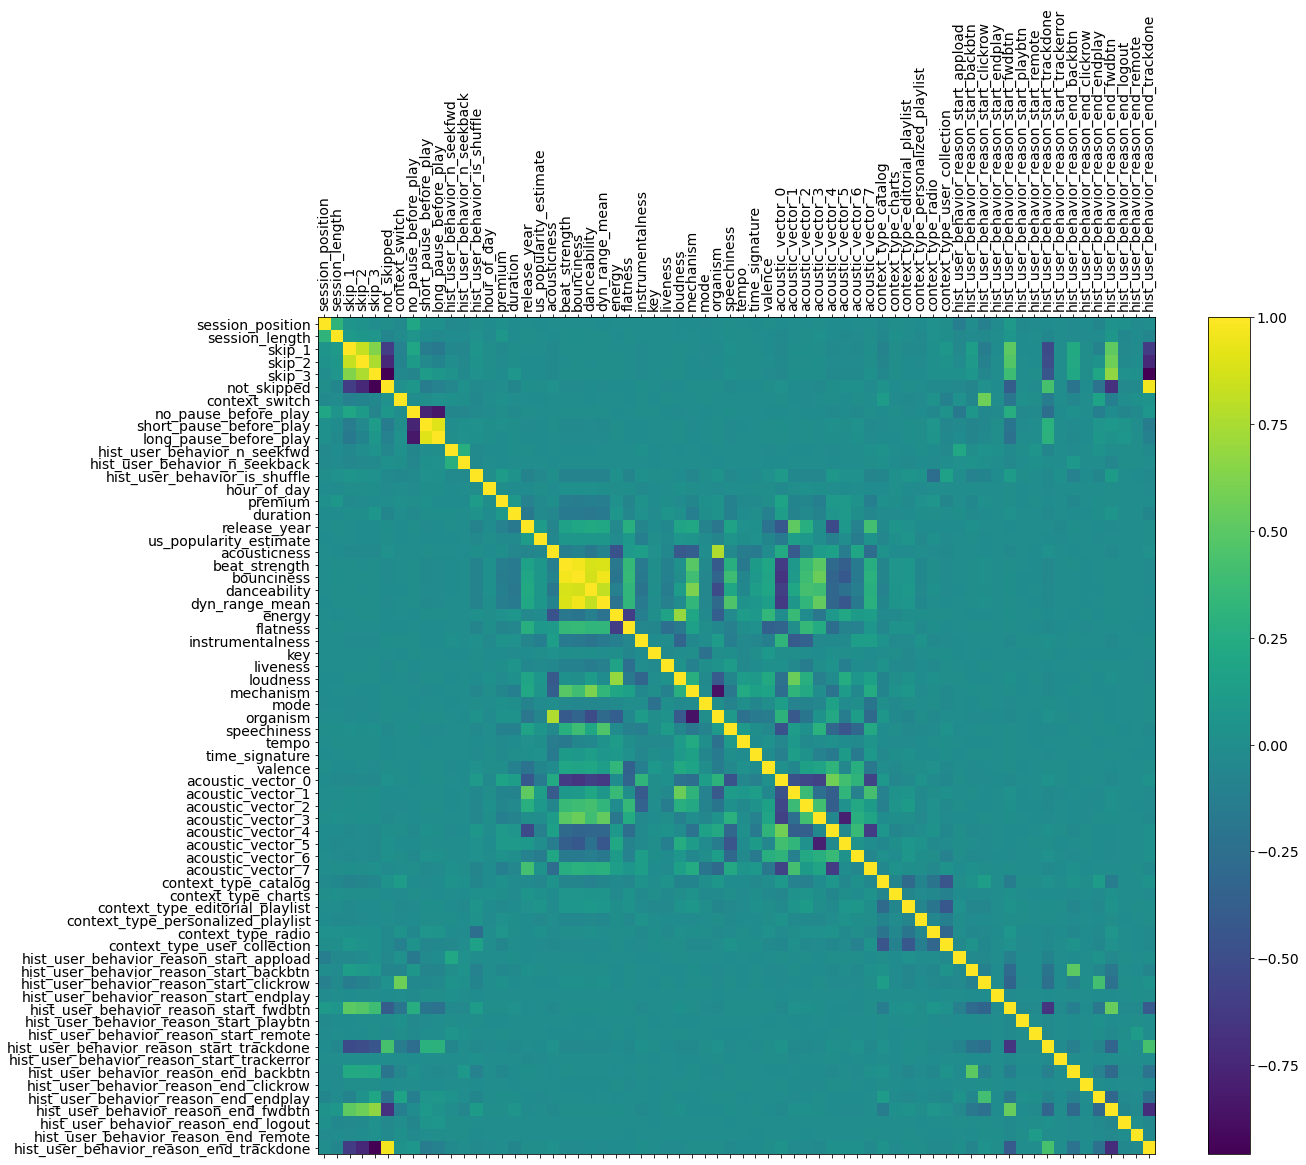

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
df1=df1.drop(["beat_strength","dyn_range_mean","skip_1","skip_3","not_skipped"],axis='columns')

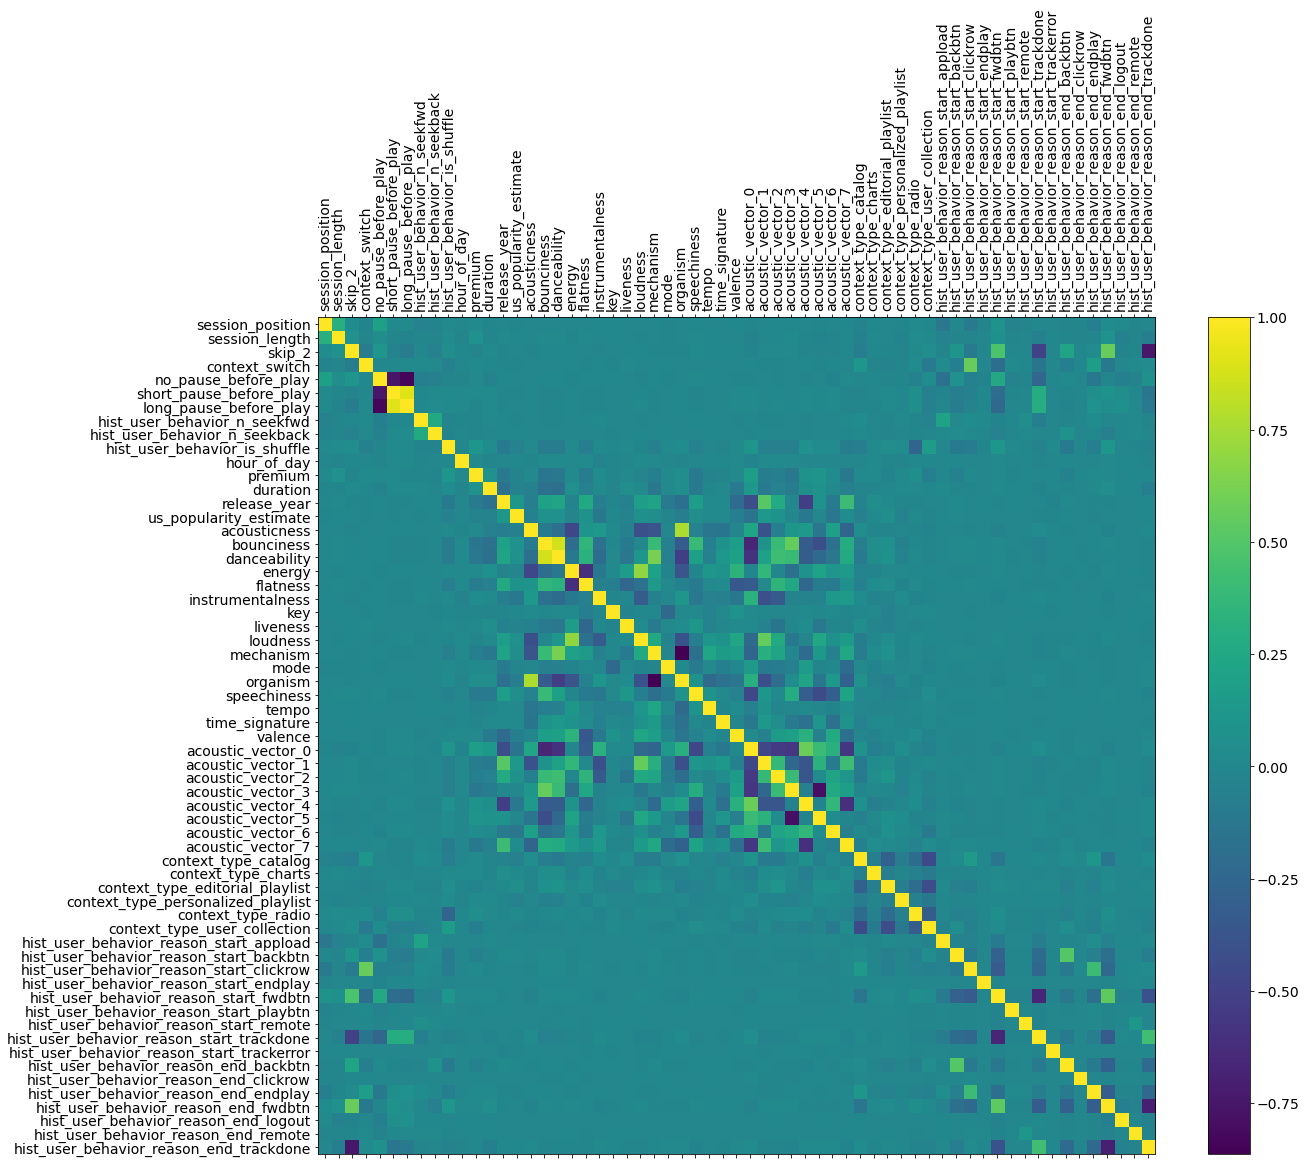

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
data_training = df1[df1['session_position']<0.5].copy()
data_test = df1[df1['session_position']>=0.5].copy()

# Principle Component Analysis

In [ ]:
df1.shape

(167880, 65)

In [ ]:
df1.head()

,session_id,session_position,session_length,track_id_clean,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,track_id,duration,release_year,us_popularity_estimate,acousticness,bounciness,danceability,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,0,0.0,0.0,1,16,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.486798,0.663098,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,1,0.0,0.0,0,17,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.486798,0.663098,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,1,0.0,0.0,0,21,2018-07-14,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.486798,0.663098,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0.0,0.0,0,18,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.486798,0.663098,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,1,0.0,0.0,1,19,2018-07-14,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.486798,0.663098,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
df1.drop(['session_id', 'track_id_clean','skip_2', 'track_id','date','instrumentalness'],axis = 'columns',inplace = True)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df1.dtypes

session_position                                int64
session_length                                  int64
context_switch                                  int64
no_pause_before_play                            int64
short_pause_before_play                         int64
long_pause_before_play                          int64
hist_user_behavior_n_seekfwd                  float64
hist_user_behavior_n_seekback                 float64
hist_user_behavior_is_shuffle                   int64
hour_of_day                                     int64
premium                                         int64
duration                                      float64
release_year                                    int64
us_popularity_estimate                        float64
acousticness                                  float64
bounciness                                    float64
danceability                                  float64
energy                                        float64
flatness                    

In [ ]:
pca=PCA(n_components=30)

In [ ]:
pca.fit(df1)

PCA(n_components=30)

In [ ]:
x_pca=pca.transform(df1)

In [ ]:
df1.shape

(167880, 59)

In [ ]:
x_pca.shape

(167880, 30)

# LGBT

In [ ]:
from datetime import datetime

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y = df['skip_2'].values

split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

training the dataset with lightgbm

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)

In [ ]:
lgbm_params = {'learning_rate':0.05, 'boosting_type':'gbdt',
                       'objective':'binary',
                       'metric':['auc', 'binary_logloss'],
                       'num_leaves':100,
                       'max_depth':10}

In [ ]:
start=datetime.now()
clf = lgb.train(lgbm_params, d_train, 50)
stop=datetime.now()
execution_time_lgbm = stop-start
print("LGBM execution time is:", execution_time_lgbm)

LGBM execution time is: 0:00:05.136318


model predictions

In [ ]:
y_pred_lgbm = clf.predict(X_test)

In [ ]:
for i in range(0, X_test.shape[0]):
    if y_pred_lgbm[i]>=.5:
        y_pred_lgbm[i]=1
    else:
        y_pred_lgbm[i]=0
metrics.accuracy_score(y_pred_lgbm, y_test)

0.8712175363354777

confusion matrix

In [ ]:
cm = confusion_matrix(y_pred_lgbm, y_test)

In [ ]:
cm

array([[13516,  1563],
       [ 2761, 15736]])

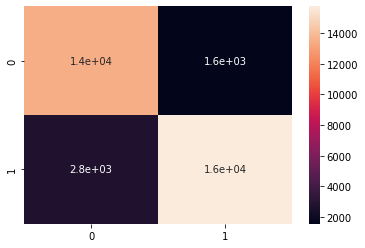

In [ ]:
sns.heatmap(cm, annot=True)

# SVM

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
svc=SVC() #Default hyperparameters

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=svc.predict(X_test)

In [ ]:
print('Accuracy Score:')

Accuracy Score:


In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.8727364784369788


# LSTM(RNN)

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from pylab import rcParams
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style = 'whitegrid', palette='muted', font_scale = 1.5)

rcParams['figure.figsize']= 22,10

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
sp_track = pd.read_csv("/content/drive/MyDrive/spotify/Track features.csv")
sp_track.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,2.541884e-10,0,0.189162,-6.836,0.281250,major,0.723808,0.032043,95.261002,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [ ]:
sp_track['mode'] = df['mode'].replace({
    'major': 1,
    'minor': 0
})

In [ ]:
print(df['release_year'].head())
df['release_year'] = pd.to_datetime(df['release_year'], format="%Y-%m-%d")

0   1970-01-01 00:00:00.000002018
1   1970-01-01 00:00:00.000002018
2   1970-01-01 00:00:00.000002018
3   1970-01-01 00:00:00.000002018
4   1970-01-01 00:00:00.000002018
Name: release_year, dtype: datetime64[ns]


In [ ]:
sp_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [ ]:
sp_track.drop(['track_id', 'beat_strength', 'bounciness','dyn_range_mean','mechanism', 'organism', 'time_signature'],axis = 'columns',inplace = True)


In [ ]:
sp_track = sp_track.astype('float64')

In [ ]:
sp_track.index

RangeIndex(start=0, stop=50704, step=1)

In [ ]:
sp_track.release_year=pd.to_datetime(sp_track.release_year, format='%Y')
sp_track.head()

,duration,release_year,us_popularity_estimate,acousticness,danceability,energy,flatness,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,109.706673,1950-01-01,99.975414,0.458040,0.399767,0.817709,0.903753,3.254327e-06,0.0,0.132124,-11.238,1.0,0.079985,166.287003,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,187.693329,1950-01-01,99.969430,0.916272,0.491235,0.154258,1.037952,8.344854e-12,0.0,0.163281,-13.706,1.0,0.083877,95.261002,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,160.839996,1951-01-01,99.602549,0.812884,0.491625,0.358813,1.004268,2.927475e-10,0.0,0.090115,-10.522,1.0,0.038777,105.185997,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,175.399994,1951-01-01,99.665018,0.396854,0.552227,0.514585,0.975138,3.981341e-11,0.0,0.360924,-11.032,1.0,0.038337,119.441002,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,369.600006,1951-01-01,99.991764,0.728831,0.483044,0.721442,0.976866,2.541884e-10,0.0,0.189162,-6.836,1.0,0.032043,95.261002,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [ ]:

annual_avg_pop = sp_track[["acousticness","loudness","energy","valence", "release_year"]].\
groupby("release_year").mean().sort_values(by="release_year").reset_index()

annual_avg_pop.head()

,release_year,acousticness,loudness,energy,valence
0,1950-01-01,0.693839,-12.673286,0.388980,0.625568
1,1951-01-01,0.615526,-12.190095,0.412639,0.544959
2,1952-01-01,0.717168,-10.997000,0.434051,0.613674
3,1953-01-01,0.760929,-19.522750,0.149385,0.491161
4,1954-01-01,0.772853,-13.888461,0.322655,0.583434


In [ ]:
def normalize(sp_track):
    result = sp_track.copy()
    for feature_name in sp_track.columns:
        if feature_name != 'release_year':
            # Min-Max Scale If it Is Not the Year Column
            max_value = sp_track[feature_name].max()
            min_value = sp_track[feature_name].min()
            result[feature_name] = (sp_track[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
df_2 = normalize(annual_avg_pop)

In [ ]:
annual_avg_niche = sp_track[["mode","speechiness","tempo","liveness","release_year"]].\
groupby("release_year").mean().sort_values(by="release_year").reset_index()

annual_avg_niche.head()

,release_year,mode,speechiness,tempo,liveness
0,1950-01-01,1.000000,0.059039,139.130716,0.181120
1,1951-01-01,0.952381,0.045516,115.954476,0.182438
2,1952-01-01,1.000000,0.035457,110.896252,0.230948
3,1953-01-01,0.500000,0.058154,100.045998,0.105662
4,1954-01-01,0.615385,0.087056,114.775077,0.175277


In [ ]:
df_3 = normalize(annual_avg_niche)


In [ ]:
df['release_year'].nunique()

69

In [ ]:
df_2.release_year=pd.to_datetime(df_2.release_year, format='%Y')
df_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_year  69 non-null     datetime64[ns]
 1   acousticness  69 non-null     float64       
 2   loudness      69 non-null     float64       
 3   energy        69 non-null     float64       
 4   valence       69 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.8 KB


In [ ]:
df_2.set_index('release_year', inplace=True)
df_2.head()

,acousticness,loudness,energy,valence
release_year,,,,
1950-01-01,0.875496,0.528261,0.430923,0.542011
1951-01-01,0.752096,0.565527,0.473475,0.295341
1952-01-01,0.912256,0.657543,0.511986,0.505612
1953-01-01,0.981211,0.000000,0.000000,0.130712
1954-01-01,1.000000,0.434541,0.311635,0.413075


In [ ]:
df_3.release_year=pd.to_datetime(df_3.release_year, format='%Y')


In [ ]:
df_3.set_index('release_year', inplace=True)
df_3.head()

,mode,speechiness,tempo,liveness
release_year,,,,
1950-01-01,1.000000,0.217257,1.000000,0.451984
1951-01-01,0.925170,0.092672,0.407026,0.459877
1952-01-01,1.000000,0.000000,0.277609,0.750442
1953-01-01,0.214286,0.209100,0.000000,0.000000
1954-01-01,0.395604,0.475365,0.376850,0.416983


 Time Series Models for Each Feature

In [ ]:
sp_track_ts = []
for column in df_2:
    #Create separate dataframes for each category
    sp_track = df_2[column]
    sp_track = sp_track.to_frame()
    sp_track_ts.append(sp_track)
sp_track_ts[0].head()

,acousticness
release_year,
1950-01-01,0.875496
1951-01-01,0.752096
1952-01-01,0.912256
1953-01-01,0.981211
1954-01-01,1.000000


In [ ]:
type(sp_track_ts[0])

pandas.core.frame.DataFrame

In [ ]:
sp_track_ts2 = []
for column in df_3:
    #Create separate dataframes for each zipcode with a monthly frequency.
    sp_track = df_3[column]
    sp_track = sp_track.to_frame()
    sp_track_ts2.append(sp_track)
sp_track_ts2[0].head()

,mode
release_year,
1950-01-01,1.000000
1951-01-01,0.925170
1952-01-01,1.000000
1953-01-01,0.214286
1954-01-01,0.395604


Individual Time Series

In [ ]:
acous_ts = sp_track_ts[0] # Acousticness Prevalence Time Series

loudness_ts = sp_track_ts[1] # Loudness Prevalence Time Series

energy_ts = sp_track_ts[2] # Energy Prevalence Time Series

valence_ts = sp_track_ts[3]# # Valence Prevalence Time Series

In [ ]:
mode_ts = sp_track_ts2[0] # Mode Prevalence Time Series

speechiness_ts = sp_track_ts2[1] # Speechiness Prevalence Time Series

tempo_ts = sp_track_ts2[2] # Tempo Time Series

liveness_ts = sp_track_ts2[3] # Degree of Liveness Time Series

Test Train Split

In [ ]:
#Acoustiness
train_size = int(len(acous_ts) * 0.8)
test_size = len(acous_ts) - train_size

train, test = acous_ts.iloc[0:train_size], acous_ts.iloc[train_size:len(acous_ts)]

print(train.shape, test.shape)

(55, 1) (14, 1)


In [ ]:
#Dataset for X, y Train and Test
def create_dataset (X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i: (i + time_steps)].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
TIME_STEPS = 5 # five years

X_train, y_train = create_dataset(train, train.acousticness, time_steps = TIME_STEPS)
X_test, y_test = create_dataset(test, test.acousticness, time_steps = TIME_STEPS)

In [ ]:
print (X_train.shape, y_train.shape)

(50, 5, 1) (50,)


In [ ]:
print (X_test.shape, y_test.shape)

(9, 5, 1) (9,)


In [ ]:
X_train[0][0]

array([0.87549555])

Model Building

In [ ]:
model = keras.Sequential()

model.add(LSTM(units = 64, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))

model.add(LSTM(units = 30, return_sequences = False))

model.add(Dropout(0.25))

model.add(Dense(units=1, activation = 'linear'))

In [ ]:
from tensorflow.keras.optimizers import Adam


In [ ]:
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
type(X_train)
type(y_train)

numpy.ndarray

In [ ]:
#LSTM
history = model.fit(
    X_train, y_train,
    epochs = 40,
    batch_size = 10,
    validation_split = 0.2,
    shuffle=False
)

Epoch 1/40
4/4 [==============================] - 6s 295ms/step - loss: 0.1824 - accuracy: 0.0250 - val_loss: 0.0215 - val_accuracy: 0.0000e+00
Epoch 2/40
4/4 [==============================] - 0s 11ms/step - loss: 0.0192 - accuracy: 0.0250 - val_loss: 0.0070 - val_accuracy: 0.0000e+00
Epoch 3/40
4/4 [==============================] - 0s 11ms/step - loss: 0.0589 - accuracy: 0.0250 - val_loss: 0.0111 - val_accuracy: 0.0000e+00
Epoch 4/40
4/4 [==============================] - 0s 10ms/step - loss: 0.0222 - accuracy: 0.0250 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 5/40
4/4 [==============================] - 0s 10ms/step - loss: 0.0211 - accuracy: 0.0250 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 6/40
4/4 [==============================] - 0s 10ms/step - loss: 0.0144 - accuracy: 0.0250 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 7/40
4/4 [==============================] - 0s 14ms/step - loss: 0.0295 - accuracy: 0.0250 - val_loss: 0.0097 - val_accuracy: 0.0000e+0

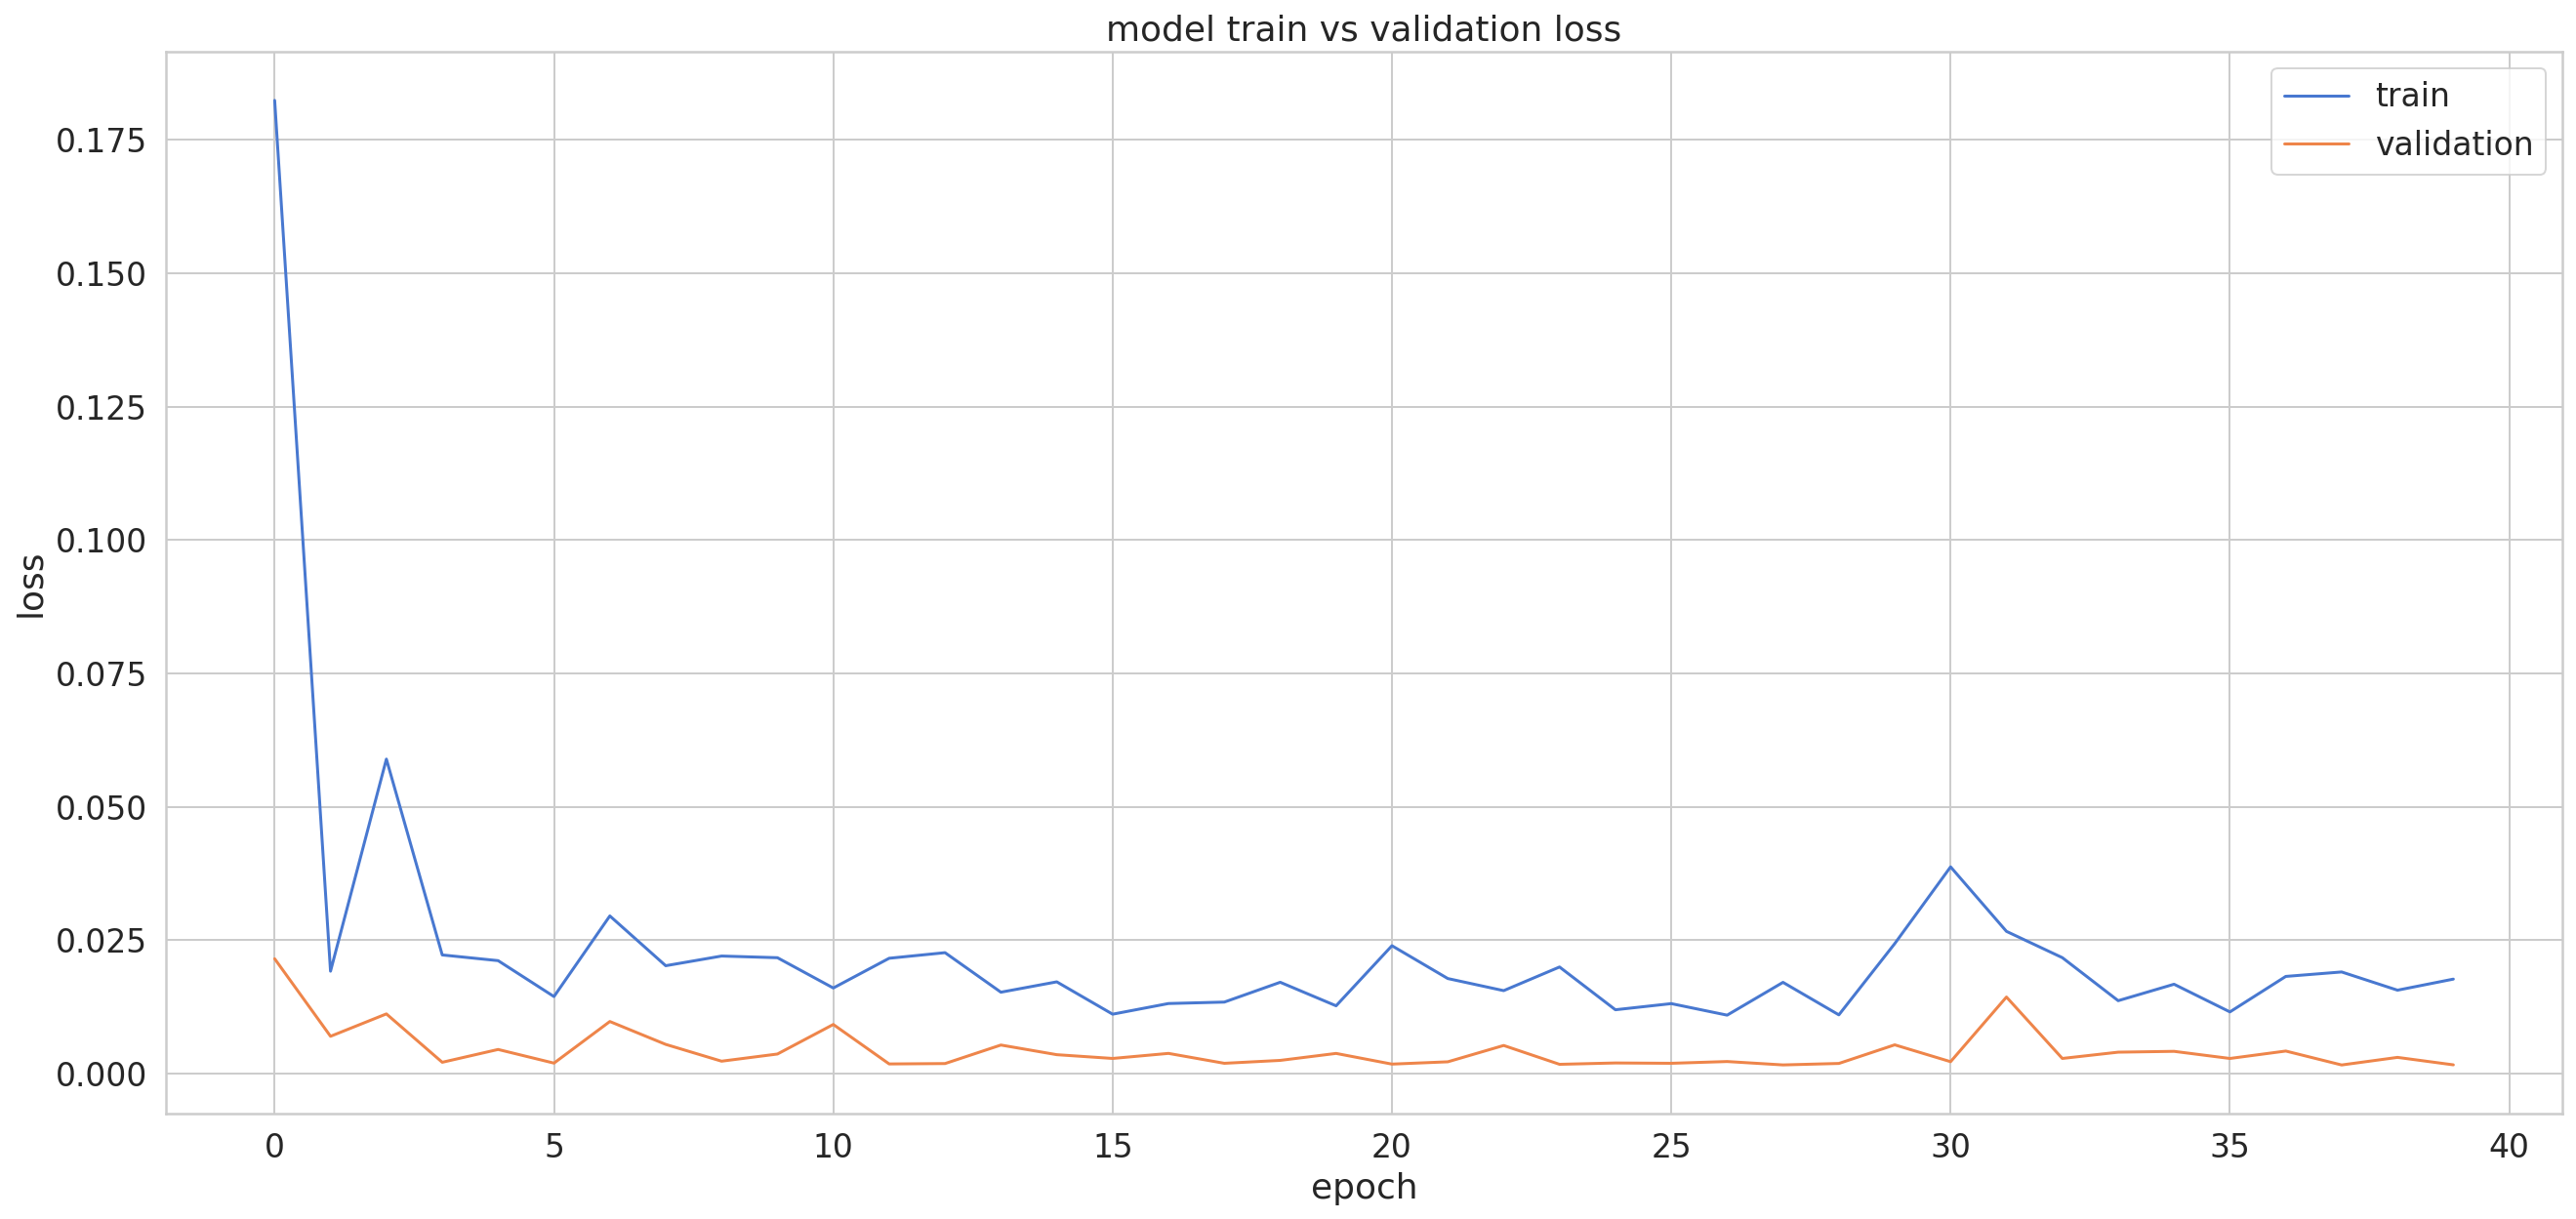

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

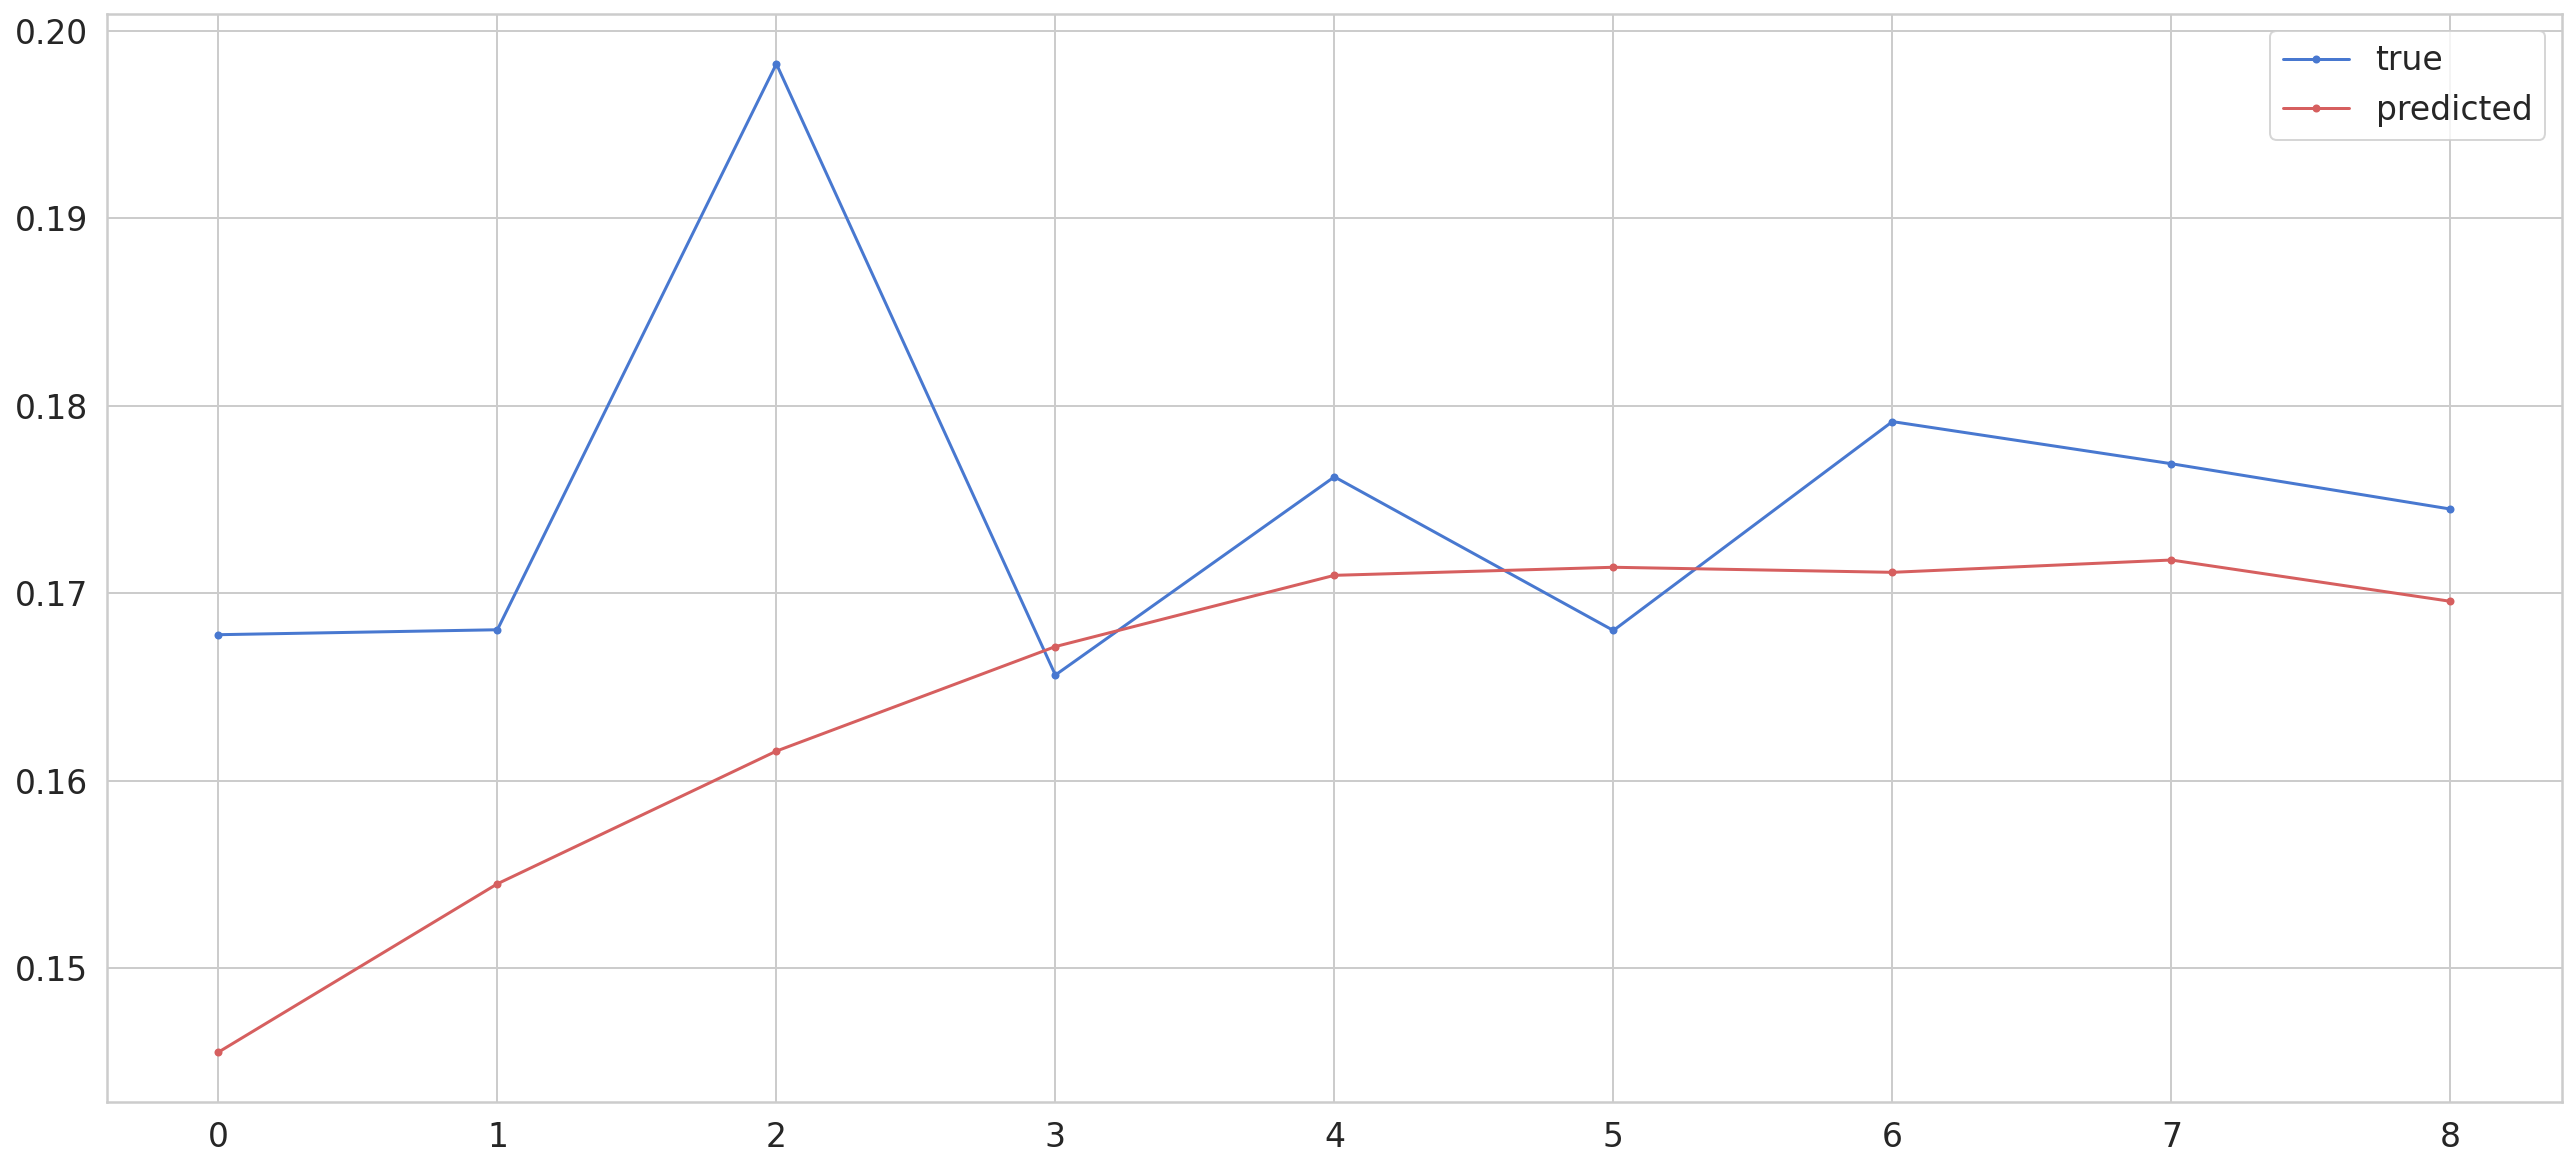

In [ ]:
plt.plot(y_test, marker='.', label='true')
plt.plot(y_pred, 'r',marker='.', label='predicted')
plt.legend();

In [ ]:
#Energy
train_size = int(len(energy_ts) * 0.8)
test_size = len(energy_ts) - train_size

train, test = energy_ts.iloc[0:train_size], energy_ts.iloc[train_size:len(energy_ts)]

print(train.shape, test.shape)

(55, 1) (14, 1)


In [ ]:
TIME_STEPS = 5 # seven years

X_train, y_train = create_dataset(train, train.energy, time_steps = TIME_STEPS)
X_test, y_test = create_dataset(test, test.energy, time_steps = TIME_STEPS)

In [ ]:
model = keras.Sequential()

model.add(LSTM(units = 64, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))

model.add(LSTM(units = 30, return_sequences = False))

model.add(Dropout(0.25))

model.add(Dense(units=1, activation = 'linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=0.01))


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 100,
    batch_size = 30,
    validation_split = 0.1,
    shuffle=False
)

Epoch 1/100
2/2 [==============================] - 4s 828ms/step - loss: 0.4250 - val_loss: 0.0022
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0766 - val_loss: 0.0271
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0388 - val_loss: 0.0986
Epoch 4/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0980 - val_loss: 0.1053
Epoch 5/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0657 - val_loss: 0.0155
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0161 - val_loss: 0.0084
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0409 - val_loss: 0.0144
Epoch 8/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0423 - val_loss: 5.3111e-04
Epoch 9/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0205 - val_loss: 0.0142
Epoch 10/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0198 - val_loss: 0.0272
Epoch 11/100
2

In [ ]:
y_pred = model.predict(X_test)


# Multifeature lstm


Add more features

In [ ]:
sp_track_tss = pd.concat(sp_track_ts, axis=1)


In [ ]:
sp_track_tss.head()


,acousticness,loudness,energy,valence
release_year,,,,
1950-01-01,0.875496,0.528261,0.430923,0.542011
1951-01-01,0.752096,0.565527,0.473475,0.295341
1952-01-01,0.912256,0.657543,0.511986,0.505612
1953-01-01,0.981211,0.000000,0.000000,0.130712
1954-01-01,1.000000,0.434541,0.311635,0.413075


In [ ]:
#Acoustiness
train_size = int(len(sp_track_tss) * 0.8)
test_size = len(sp_track_tss) - train_size

train, test = sp_track_tss.iloc[0:train_size], sp_track_tss.iloc[train_size:len(sp_track_tss)]

print(train.shape, test.shape)

(55, 4) (14, 4)


In [ ]:
TIME_STEPS = 5 # five years

X_train, y_train = create_dataset(train, train.acousticness, time_steps = TIME_STEPS)
X_test, y_test = create_dataset(test, test.acousticness, time_steps = TIME_STEPS)

In [ ]:
model = keras.Sequential()

model.add(LSTM(units = 64, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))

model.add(LSTM(units = 32, return_sequences = False))

model.add(Dropout(0.25))

model.add(Dense(units=1, activation = 'linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=0.01))

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 100,
    batch_size = 64,
    validation_split = 0.1,
    shuffle=False
)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.2188 - val_loss: 0.0164
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 0.0829 - val_loss: 0.1022
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 0.1034 - val_loss: 0.0265
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0537 - val_loss: 1.0981e-04
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0383 - val_loss: 0.0057
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0384 - val_loss: 0.0033
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0204 - val_loss: 2.4694e-04
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0182 - val_loss: 0.0014
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0284 - val_loss: 0.0190
Epoch 10/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0148 - val_loss: 0.0379
Epoch 11/100


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
#Energy
train_size = int(len(sp_track_tss) * 0.8)
test_size = len(sp_track_tss) - train_size

train, test = sp_track_tss.iloc[0:train_size], sp_track_tss.iloc[train_size:len(sp_track_tss)]

print(train.shape, test.shape)

(55, 4) (14, 4)


In [ ]:
TIME_STEPS = 5 # five years

X_train, y_train = create_dataset(train, train.energy, time_steps = TIME_STEPS)
X_test, y_test = create_dataset(test, test.energy, time_steps = TIME_STEPS)

In [ ]:
model = keras.Sequential()

model.add(LSTM(units = 64, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))

model.add(LSTM(units = 32, return_sequences = False))

model.add(Dropout(0.25))

model.add(Dense(units=1, activation = 'linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=0.01), metrics=['accuracy'])


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 100,
    batch_size = 64,
    validation_split = 0.1,
    shuffle=False
)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.5983 - accuracy: 0.0000e+00 - val_loss: 0.1576 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0899 - accuracy: 0.0222 - val_loss: 0.1615 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 0.3045 - accuracy: 0.0222 - val_loss: 5.9688e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0251 - accuracy: 0.0222 - val_loss: 0.0778 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0598 - accuracy: 0.0222 - val_loss: 0.1530 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 0.1075 - accuracy: 0.0000e+00 - val_loss: 0.1564 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0997 - accuracy: 0.0222 - val_loss: 0.1134 - val_acc

In [ ]:
y_pred = model.predict(X_test)
